# Analysis of Temperature Profile in Extractive Distilation Column

In [1]:
import pandas as pd
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

### Read data
* Data are collected from IP21 as of 1/1/2014 on an hourly basis

In [2]:
fn1 = "P:\Collaboration_intern\Benzene\Database\Benzene_V6.csv"
fn1 = 'P:\Collaboration_intern\Benzene\TProfile.txt'
df = pd.read_csv(fn1)
df.shape

(26296, 12)

### Data Processing
* Select only the 10 temperature profile tags and the recovery rate
* Data are further filtered based on a temperature range of TI-17910:av between 120 and 140°C.
* Data points with recovery rate below 10% are removed

(26296, 11)


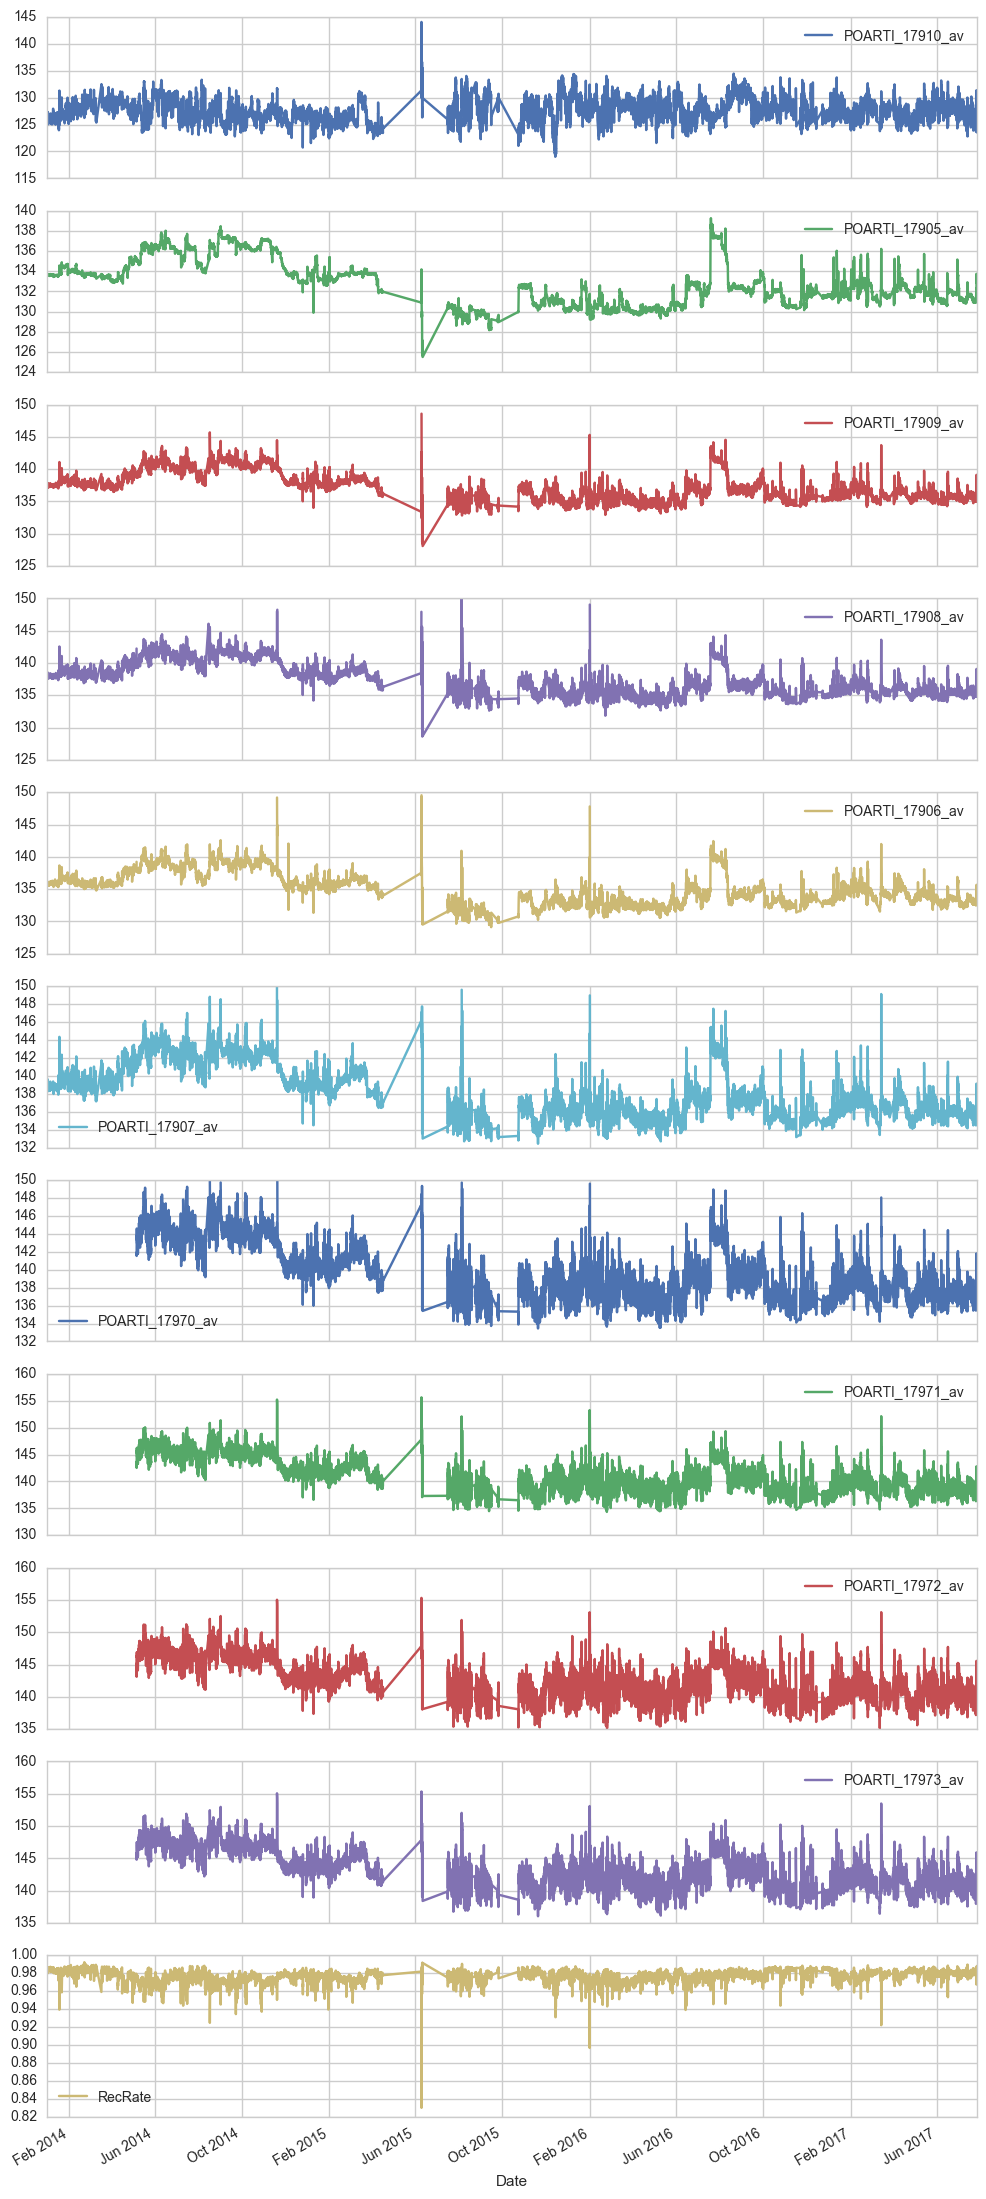

(26296, 11)


In [3]:
colnames = df.columns
colnames
cols = ['Date', 'POARTI_17910_av', 'POARTI_17905_av', 'POARTI_17909_av', 'POARTI_17908_av', 'POARTI_17906_av', 'POARTI_17907_av', 'POARTI_17970_av', 'POARTI_17971_av', 'POARTI_17972_av', 'POARTI_17973_av','RecRate']
#df[cols].describe()
df_tempcol = df[cols]
df_tempcol['Date'] = pd.to_datetime(df_tempcol['Date'])
df_tempcol.set_index('Date',inplace=True)
print(df_tempcol.shape)
#df_tempcol.dropna(inplace=True)
df_tempcol.plot(subplots=True,figsize=(12,30))
plt.show()
#df_tempcol.replace(0.0,np.nan).dropna(inplace=True)
print(df_tempcol.shape)
#df_tempcol = df_tempcol[df_tempcol['POARTI_17910_av']>120]
#df_tempcol = df_tempcol[df_tempcol['POARTI_17910_av']<140]
#df_tempcol = df_tempcol[df_tempcol['RecRate']>0.1]

Descriptive statistics of the temperature tags and recovery rate

In [4]:
df_tempcol.describe()

C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,POARTI_17910_av,POARTI_17905_av,POARTI_17909_av,POARTI_17908_av,POARTI_17906_av,POARTI_17907_av,POARTI_17970_av,POARTI_17971_av,POARTI_17972_av,POARTI_17973_av,RecRate
count,26296.000000,26296.000000,26293.000000,26266.000000,26279.000000,26265.000000,23487.000000,23525.000000,23525.000000,23525.000000,26296.000000
mean,127.641787,132.856789,137.224489,137.350601,134.994615,138.163289,139.671356,141.011023,142.475073,143.111058,0.976397
std,2.060877,2.232711,2.180364,2.473980,2.513699,2.864152,3.040091,3.084706,2.891293,2.876853,0.006597
min,119.012361,125.509868,128.096613,128.622737,129.115578,132.430796,133.447091,134.339873,135.134312,136.042534,0.830039
25%,126.216029,131.064791,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.972868
50%,127.525152,132.541849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.977391
75%,128.993674,134.008284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.980858
max,144.048079,139.256633,148.581164,149.934097,149.529173,149.947701,149.910599,155.618137,155.311126,155.345515,0.992291


In [5]:
cols1 = df_tempcol.columns.values[2:6]
print(cols1)
df_tempcol[cols1] = df_tempcol[cols1].fillna(method = 'backfill')
df_tempcol.describe()

['POARTI_17909_av' 'POARTI_17908_av' 'POARTI_17906_av' 'POARTI_17907_av']


C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,POARTI_17910_av,POARTI_17905_av,POARTI_17909_av,POARTI_17908_av,POARTI_17906_av,POARTI_17907_av,POARTI_17970_av,POARTI_17971_av,POARTI_17972_av,POARTI_17973_av,RecRate
count,26296.000000,26296.000000,26296.000000,26296.000000,26296.000000,26296.000000,23487.000000,23525.000000,23525.000000,23525.000000,26296.000000
mean,127.641787,132.856789,137.225785,137.359822,134.999818,138.175495,139.671356,141.011023,142.475073,143.111058,0.976397
std,2.060877,2.232711,2.183612,2.490066,2.523893,2.884647,3.040091,3.084706,2.891293,2.876853,0.006597
min,119.012361,125.509868,128.096613,128.622737,129.115578,132.430796,133.447091,134.339873,135.134312,136.042534,0.830039
25%,126.216029,131.064791,135.475119,135.292836,132.942274,135.785095,NaN,NaN,NaN,NaN,0.972868
50%,127.525152,132.541849,136.893318,136.767037,134.702904,137.524552,NaN,NaN,NaN,NaN,0.977391
75%,128.993674,134.008284,138.468153,139.020681,136.521574,140.203161,NaN,NaN,NaN,NaN,0.980858
max,144.048079,139.256633,148.581164,149.934097,149.529173,149.947701,149.910599,155.618137,155.311126,155.345515,0.992291


In [6]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))
from sklearn import linear_model
#from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

cols1 = df_tempcol.columns.values[0:6]
cols2 = df_tempcol.columns.values[6:10]
print(cols2)
for i in cols2:
    cols = np.append(cols1,i)
    print(cols)
    data = df_tempcol[cols]
    X = data[cols1]
    y = data[i]
    print(data.describe())
    newdata = data[data[i].isnull()]
    print(newdata.describe())
    
    data = data.dropna(axis=0, how='any')
    data.index = range(len(data))
    print(len(data))
    X = data[cols1]
    y = data[i]
    n_sample = len(X)
    print(n_sample)
    np.random.seed(0)
    order = np.random.permutation(n_sample)
    print(order)
    #print(X)
    X = X.loc[order,:].sort_index()
    y = y.loc[order].sort_index()
    test_size = 0.7
    numrows = int((1.0-test_size) * n_sample)
    X_train = X.loc[:numrows,:]
    y_train = y.loc[:numrows]
    X_test = X.loc[numrows:,:]
    y_test = y[numrows:]

    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    regr = linear_model.LinearRegression()
    regr.fit(X_train, y_train)
    y_pred=regr.predict(X_test)
    print(mean_squared_error(y_test, y_pred))
    
    #predict unlabelled new data
    y_prednew = regr.predict(newdata[cols1])
    newdata['prediction'] = y_prednew
    print(newdata.describe())
    df_tempcol = df_tempcol.join(newdata['prediction'])
    df_tempcol.loc[df_tempcol[i].isnull(),i]=df_tempcol['prediction']
    df_tempcol.drop('prediction', axis=1, inplace=True)
    #df_tempcol[i] = df_tempcol[i].map(newdata[i])
    #df_tempcol.loc[df_tempcol.index==newdata.index,i]=newdata.loc[newdata.index,i]
    print(df_tempcol[i].describe())

The scikit-learn version is 0.17.1.
['POARTI_17970_av' 'POARTI_17971_av' 'POARTI_17972_av' 'POARTI_17973_av']
['POARTI_17910_av' 'POARTI_17905_av' 'POARTI_17909_av' 'POARTI_17908_av'
 'POARTI_17906_av' 'POARTI_17907_av' 'POARTI_17970_av']
       POARTI_17910_av  POARTI_17905_av  POARTI_17909_av  POARTI_17908_av  \
count     26296.000000     26296.000000     26296.000000     26296.000000   
mean        127.641787       132.856789       137.225785       137.359822   
std           2.060877         2.232711         2.183612         2.490066   
min         119.012361       125.509868       128.096613       128.622737   
25%         126.216029       131.064791       135.475119       135.292836   
50%         127.525152       132.541849       136.893318       136.767037   
75%         128.993674       134.008284       138.468153       139.020681   
max         144.048079       139.256633       148.581164       149.934097   

       POARTI_17906_av  POARTI_17907_av  POARTI_17970_av  
count   

C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


0.40185809761
       POARTI_17910_av  POARTI_17905_av  POARTI_17909_av  POARTI_17908_av  \
count      2809.000000      2809.000000      2809.000000      2809.000000   
mean        128.130512       133.826429       137.924180       138.685816   
std           1.603422         0.658410         0.935665         1.352616   
min         123.939243       129.742596       134.105208       136.873627   
25%         126.938557       133.507805       137.388535       137.957176   
50%         128.237507       133.683983       137.658554       138.345474   
75%         129.148941       134.124283       138.354004       139.061600   
max         144.048079       138.456947       148.581164       149.934097   

       POARTI_17906_av  POARTI_17907_av  POARTI_17970_av   prediction  
count      2809.000000      2809.000000              0.0  2809.000000  
mean        136.383516       139.753740              NaN   141.119744  
std           1.266547         1.523927              NaN     1.822472  
min 

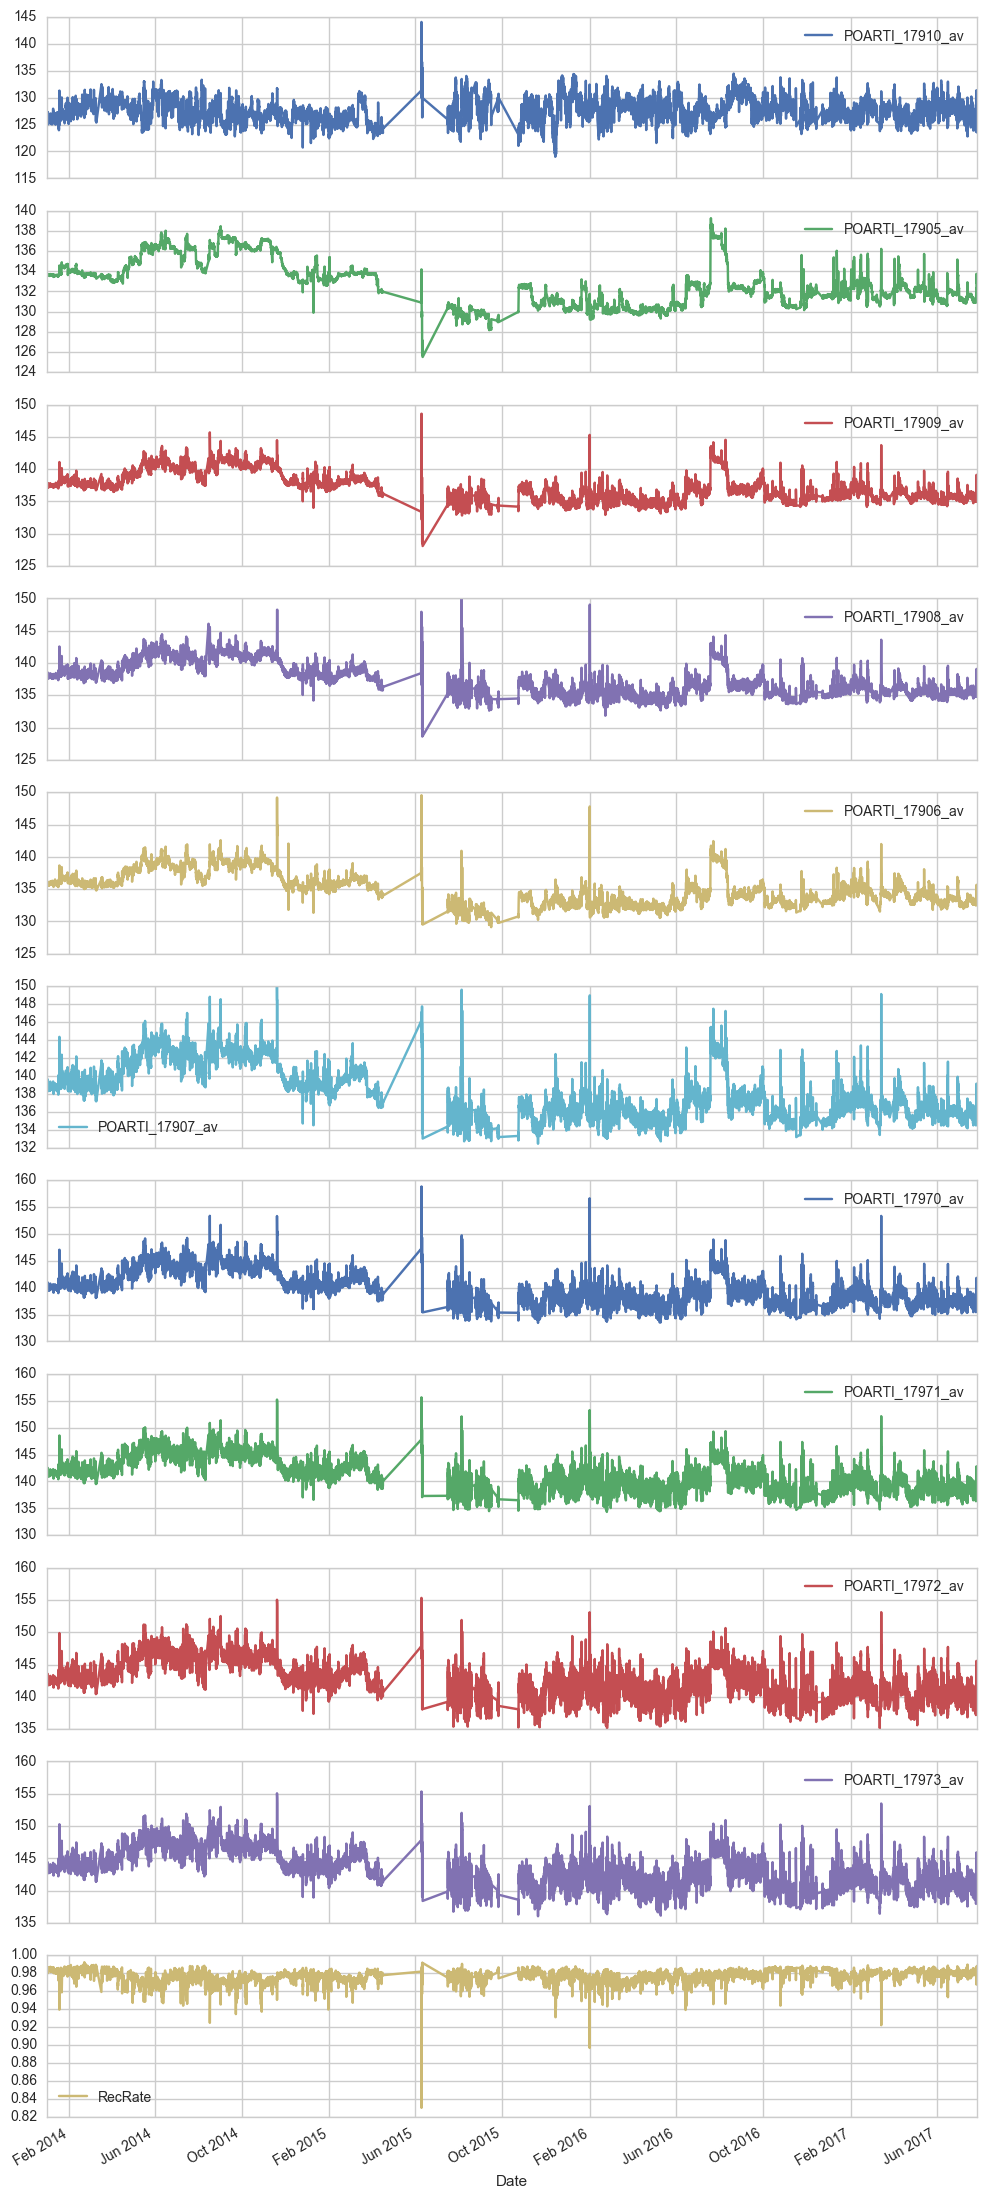

In [7]:
df_tempcol.plot(subplots=True,figsize=(12,30))
plt.show()

In [8]:
df_tempcol.describe()

,POARTI_17910_av,POARTI_17905_av,POARTI_17909_av,POARTI_17908_av,POARTI_17906_av,POARTI_17907_av,POARTI_17970_av,POARTI_17971_av,POARTI_17972_av,POARTI_17973_av,RecRate
count,26296.000000,26296.000000,26296.000000,26296.000000,26296.000000,26296.000000,26296.000000,26296.000000,26296.000000,26296.000000,26296.000000
mean,127.641787,132.856789,137.225785,137.359822,134.999818,138.175495,139.826077,141.176833,142.596691,143.257655,0.976397
std,2.060877,2.232711,2.183612,2.490066,2.523893,2.884647,2.968113,2.990066,2.794612,2.788274,0.006597
min,119.012361,125.509868,128.096613,128.622737,129.115578,132.430796,133.447091,134.339873,135.134312,136.042534,0.830039
25%,126.216029,131.064791,135.475119,135.292836,132.942274,135.785095,137.445951,138.819868,140.488871,141.109420,0.972868
50%,127.525152,132.541849,136.893318,136.767037,134.702904,137.524552,139.428952,140.834591,142.368956,143.039549,0.977391
75%,128.993674,134.008284,138.468153,139.020681,136.521574,140.203161,141.824512,143.296478,144.566718,145.236876,0.980858
max,144.048079,139.256633,148.581164,149.934097,149.529173,149.947701,158.778859,155.618137,155.311126,155.345515,0.992291


### Analysis 1: PCA

[ 0.70423502  0.21972076  0.02652715]


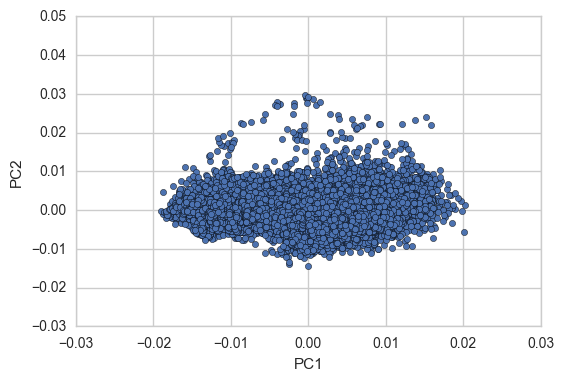

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
#X = normalize(df_tempcol[df_tempcol.columns[1:]].replace(0.0,np.nan).fillna(df_tempcol.mean()))
X = normalize(df_tempcol)
pca = PCA(n_components=3)
#Xnew = pd.DataFrame(pca.fit_transform(X),columns=['PC1','PC2','PC3','PC4','PC5'])
Xnew = pd.DataFrame(pca.fit_transform(X),columns=['PC1','PC2','PC3'])
print(pca.explained_variance_ratio_)
Xnew.plot(x='PC1',y='PC2',kind='scatter')

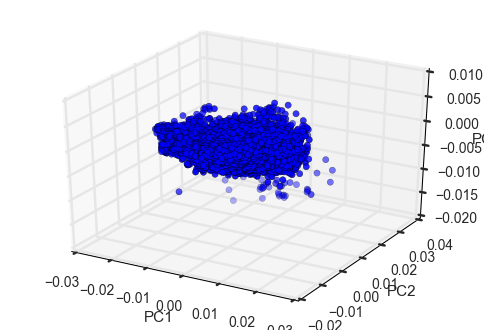

In [10]:
from mpl_toolkits.mplot3d import Axes3D
threedee = plt.figure().gca(projection='3d')
threedee.scatter(Xnew['PC1'], Xnew['PC2'], Xnew['PC3'])
threedee.set_xlabel('PC1')
threedee.set_ylabel('PC2')
threedee.set_zlabel('PC3')
plt.show()

### Analysis 2: Clustering
* Clustering with k-Means using 4,6,8 clusters

In [11]:
from sklearn.cluster import KMeans
df_clusters = pd.DataFrame()
for nc in [4,6,8]:
    kmeans = KMeans(n_clusters=nc, n_init=20).fit(X)
    #print(kmeans.cluster_centers_)
    df_clusters = pd.concat([df_clusters, pd.DataFrame(kmeans.labels_)], axis=1)
df_clusters.columns = ['KM4','KM6','KM8']
df_clusters
print(df.shape, df_clusters.shape)

(26296, 12) (26296, 3)


[0 5 3 2 4 1] 6
0 r
5 m
3 y
2 b
4 c
1 g


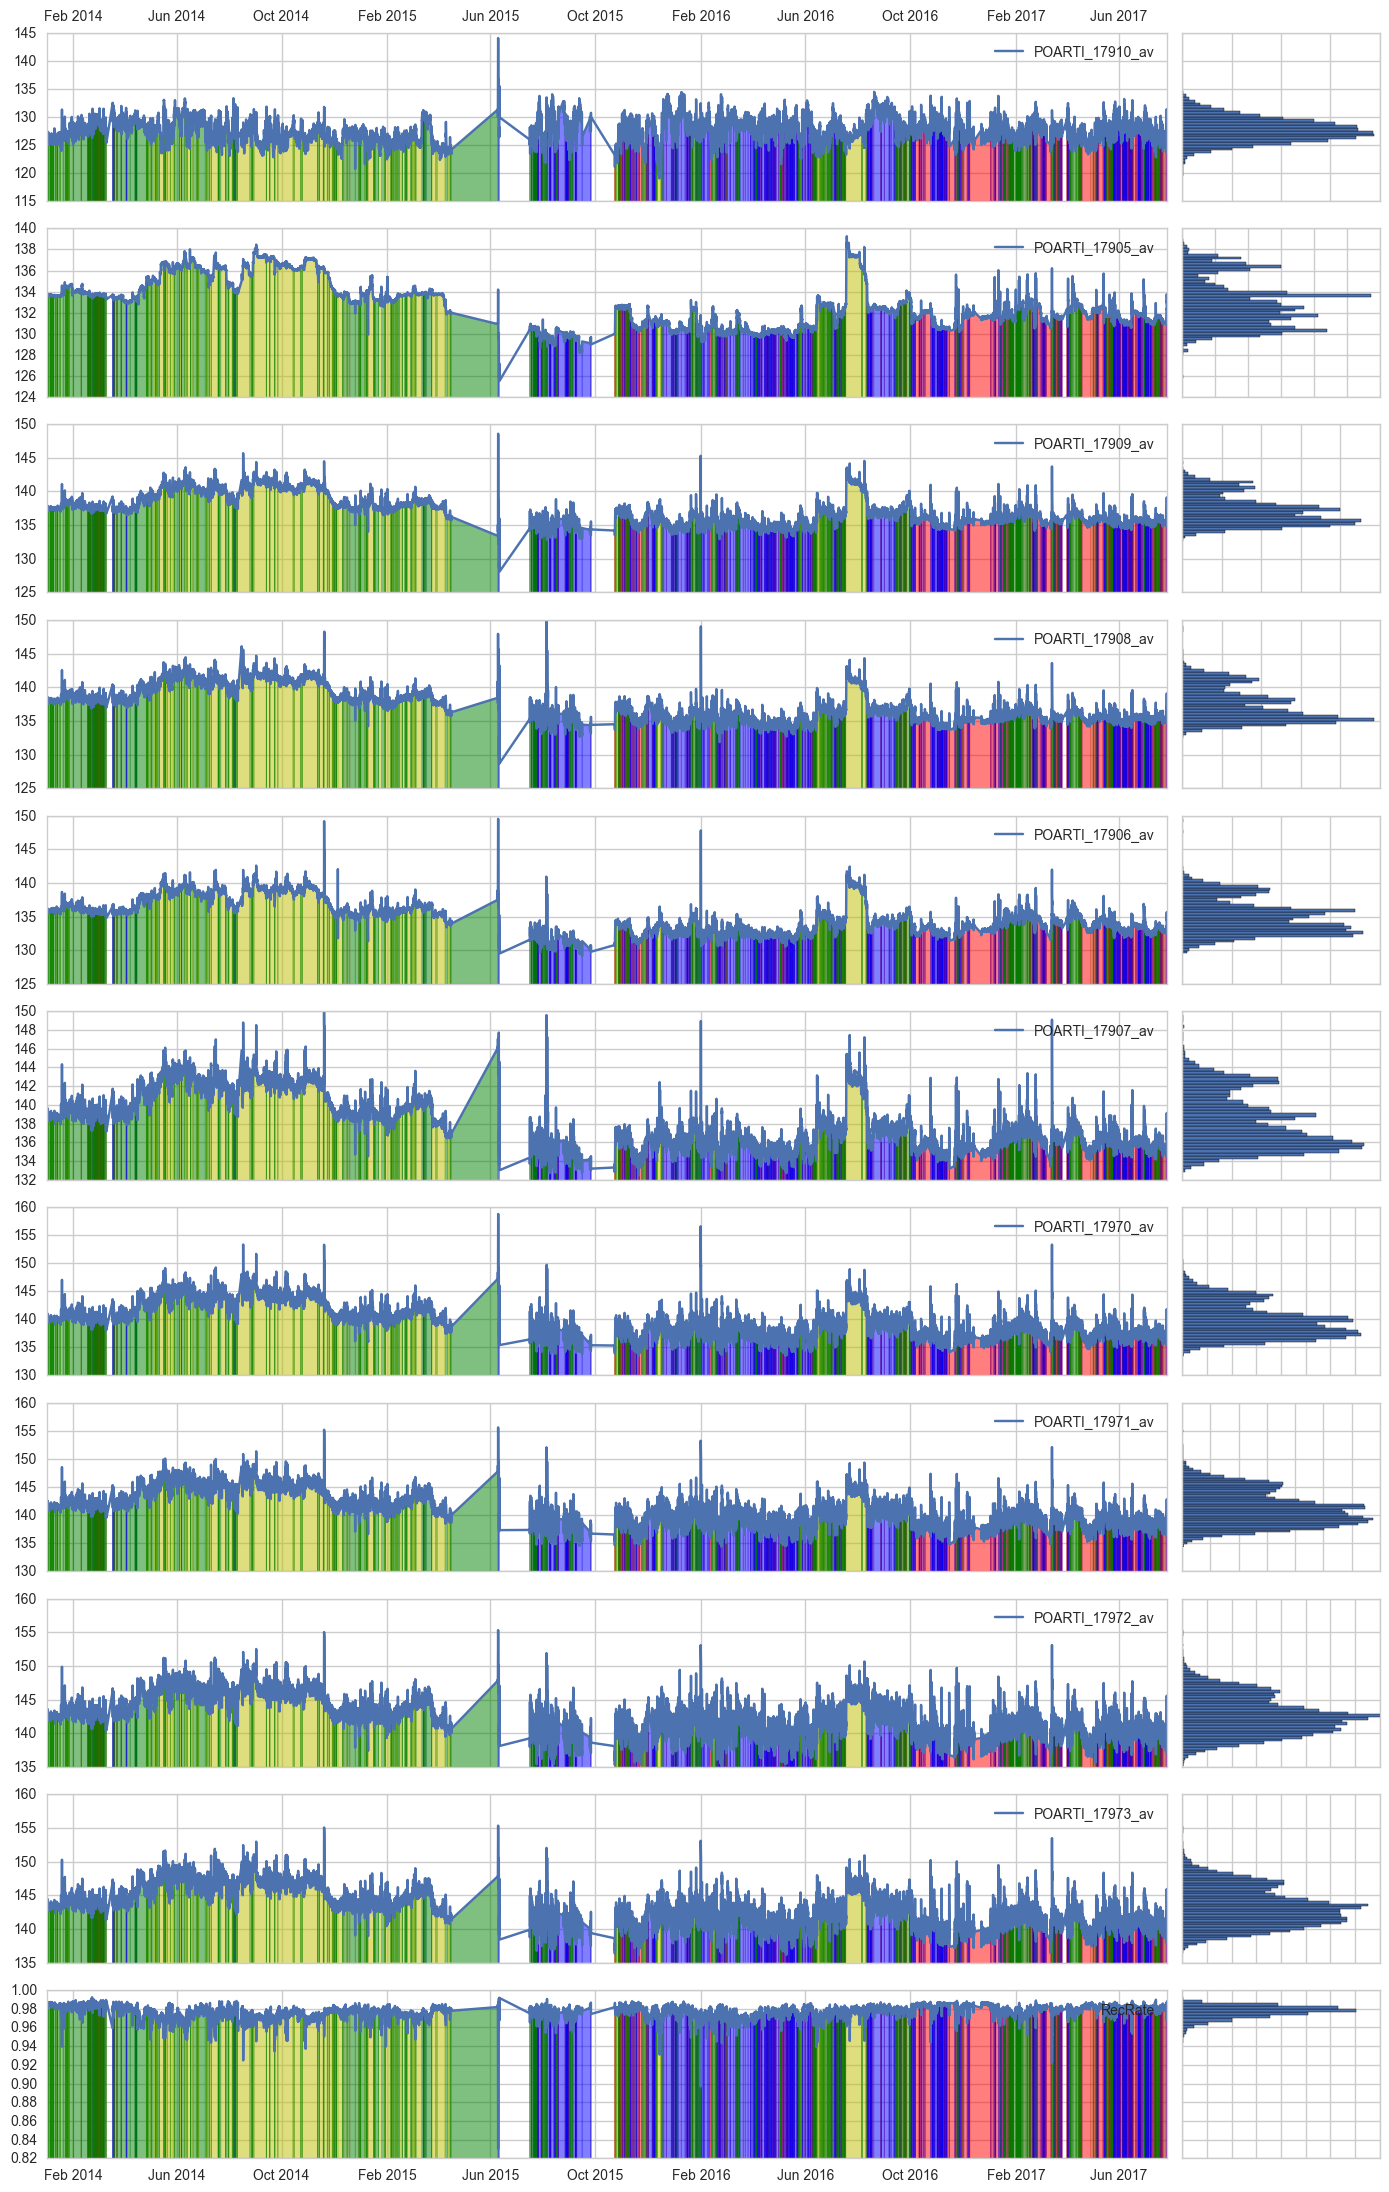

In [12]:
import matplotlib as mpl
def plottimeseries(df,df_filter):
    numSubPlots = len(df.columns)
    clusters = pd.Series(df_filter['KM6']).unique()
    numclus = len(clusters)
    print(clusters, numclus)
    #cmap=mpl.cm.Dark2.colors
    cmap=['r','g','b','y']
    cmapgen=['r','g','b','y','c','m','Olive','Brown']
    cmap = [cmapgen[i] for i in clusters]
    for j, c in zip(clusters,cmap):
        print(j, c)
    f, axarr = plt.subplots(nrows=numSubPlots, ncols=2, figsize=(14,numSubPlots*2), gridspec_kw = {'width_ratios':[17, 3]})
    for i, tag in enumerate(df.columns):
        axarr[i,0].plot(df.index, df[tag].fillna(0))
        #axarr[i,0].set_xlim([0,len(df.index)])
        #axarr[i,0].axhline(y = df[tag][df[tag]!=0].mean(), color = 'r',label='Mean (excl. zeros)')
        for j, c in zip(clusters,cmap):
            #print(j, c)
            axarr[i,0].fill_between(df.index,y1=axarr[i,0].get_ylim()[0],y2=df[tag],where=df_filter['KM4']==j,color=c,alpha=0.5)
        axarr[i,0].legend(loc='upper right',ncol=2)
        if (i!=numSubPlots-1 and i!=0):
            axarr[i,0].xaxis.set_ticklabels([])
        if i==0:
            axarr[i,0].xaxis.tick_top()
        axarr[i,1].hist(df[tag].dropna(),bins=50,normed=True,orientation='horizontal')
        #axarr[i,1].axhline(y = df[tag][df[tag]!=0].mean(), color = 'r',label='Mean (excl. zeros)')
        axarr[i,1].xaxis.set_ticklabels([])
        axarr[i,1].yaxis.set_ticklabels([])
    plt.tight_layout()
#df_tempcol
    
plottimeseries(df_tempcol,df_clusters)

In [13]:
#plottimeseries(df_tempcol[8000:12000],df_clusters[8000:12000])

In [14]:
#plottimeseries(df_tempcol[9600:25000],df_clusters[9600:25000])

### Analysis 3: Using SAX algorithm
* SAX = Symbolic Aggregate approXimation
* timeseries are converted to strings based on their distribution
* in a second step, the individual characters in the string are combined for the different temperature tags to form a profile string
* For the most occuring profile strings, histograms of the recovery rate are created

In [15]:
import TimeSeries2Sax as t2s


In [16]:
colnames = df_tempcol.columns
d = {}
bps = {}
df_tempcol['profile']=''
for c in colnames[:10]:
    SAX, PAA, bp = t2s.TS2Sax(df_tempcol[c],0,0,8,'percentile',1)
    #print(SAX)
    d[c] = SAX
    bps[c] = bp
for i in range(len(SAX.values[0])):
    profile = ""
    for c in colnames[:10]:
        profile = profile + d[c].values[0][i]
    df_tempcol['profile'].iat[i]=profile
df_tempcol.head()

,POARTI_17910_av,POARTI_17905_av,POARTI_17909_av,POARTI_17908_av,POARTI_17906_av,POARTI_17907_av,POARTI_17970_av,POARTI_17971_av,POARTI_17972_av,POARTI_17973_av,RecRate,profile
Date,,,,,,,,,,,,
2014-01-01 02:00:00,125.998837,133.538918,137.507378,138.145630,135.739525,138.762947,140.016927,141.514789,142.444464,143.307805,0.983928,BFEFFEEEEE
2014-01-01 03:00:00,126.315994,133.542091,137.381439,137.903687,135.782532,138.791962,140.030370,141.568777,142.537200,143.446621,0.983346,CFEEFEEEEE
2014-01-01 04:00:00,126.172886,133.552681,137.305252,137.654999,135.971092,138.788414,140.082541,141.619444,142.602900,143.553213,0.982196,BFEEFEEEEE
2014-01-01 05:00:00,126.321686,133.510246,137.247261,137.604935,136.029945,138.598038,139.892857,141.432842,142.397434,143.355263,0.983729,CFEEFEEEEE
2014-01-01 06:00:00,126.668285,133.548401,137.569771,138.163826,136.171883,138.959175,140.337300,141.873872,142.828722,143.713006,0.983955,CFFFFFEFEE


#### Distribution of temperature profile strings

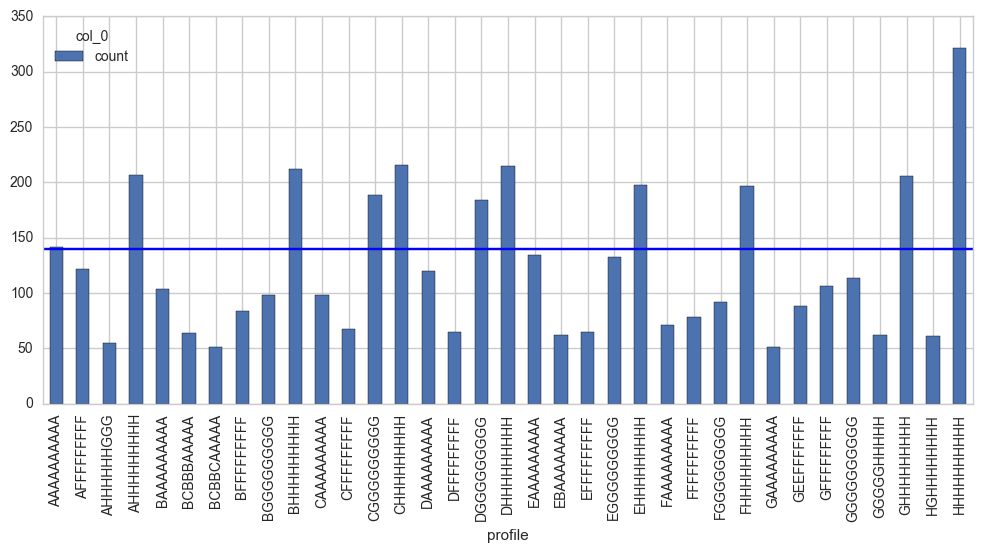

In [21]:
my_tab = pd.crosstab(index = df_tempcol['profile'],columns="count")
my_tab[my_tab['count']>50].plot.bar(figsize=(12,5))
plt.axhline(y=140)
plt.show()

#### Distribution of recovery rate (for all data)

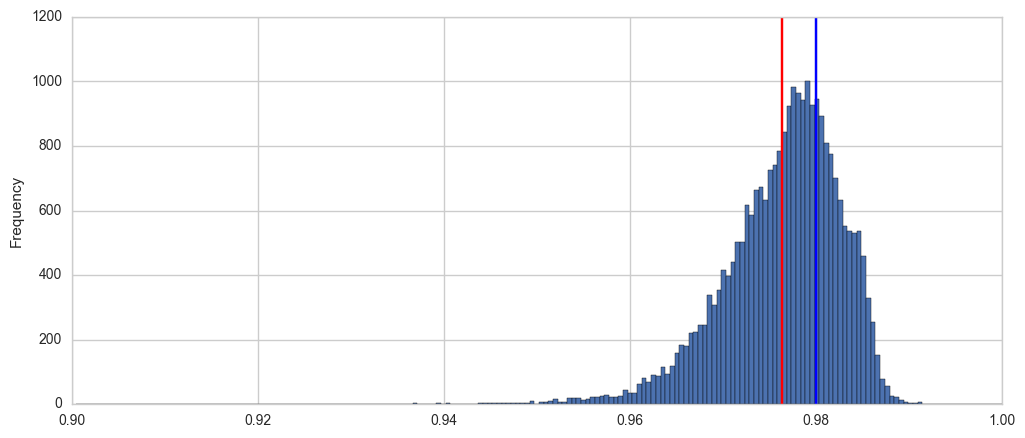

In [22]:
binBoundaries = np.linspace(0.9,1.0,200)
df_tempcol['RecRate'].plot(kind='hist', bins=binBoundaries, figsize=(12,5))
plt.axvline(x=0.98)
plt.axvline(x=df_tempcol['RecRate'].mean(),color='r')
plt.show()

#### Distribution of recovery rate for the most occuring profile strings

18 ['AAAAAAAAAA', 'BAAAAAAAAA', 'DAAAAAAAAA', 'EAAAAAAAAA', 'AFFFFFFFFF', 'GFFFFFFFFF', 'CGGGGGGGGG', 'DGGGGGGGGG', 'EGGGGGGGGG', 'GGGGGGGGGG', 'AHHHHHHHHH', 'BHHHHHHHHH', 'CHHHHHHHHH', 'DHHHHHHHHH', 'EHHHHHHHHH', 'FHHHHHHHHH', 'GHHHHHHHHH', 'HHHHHHHHHH']


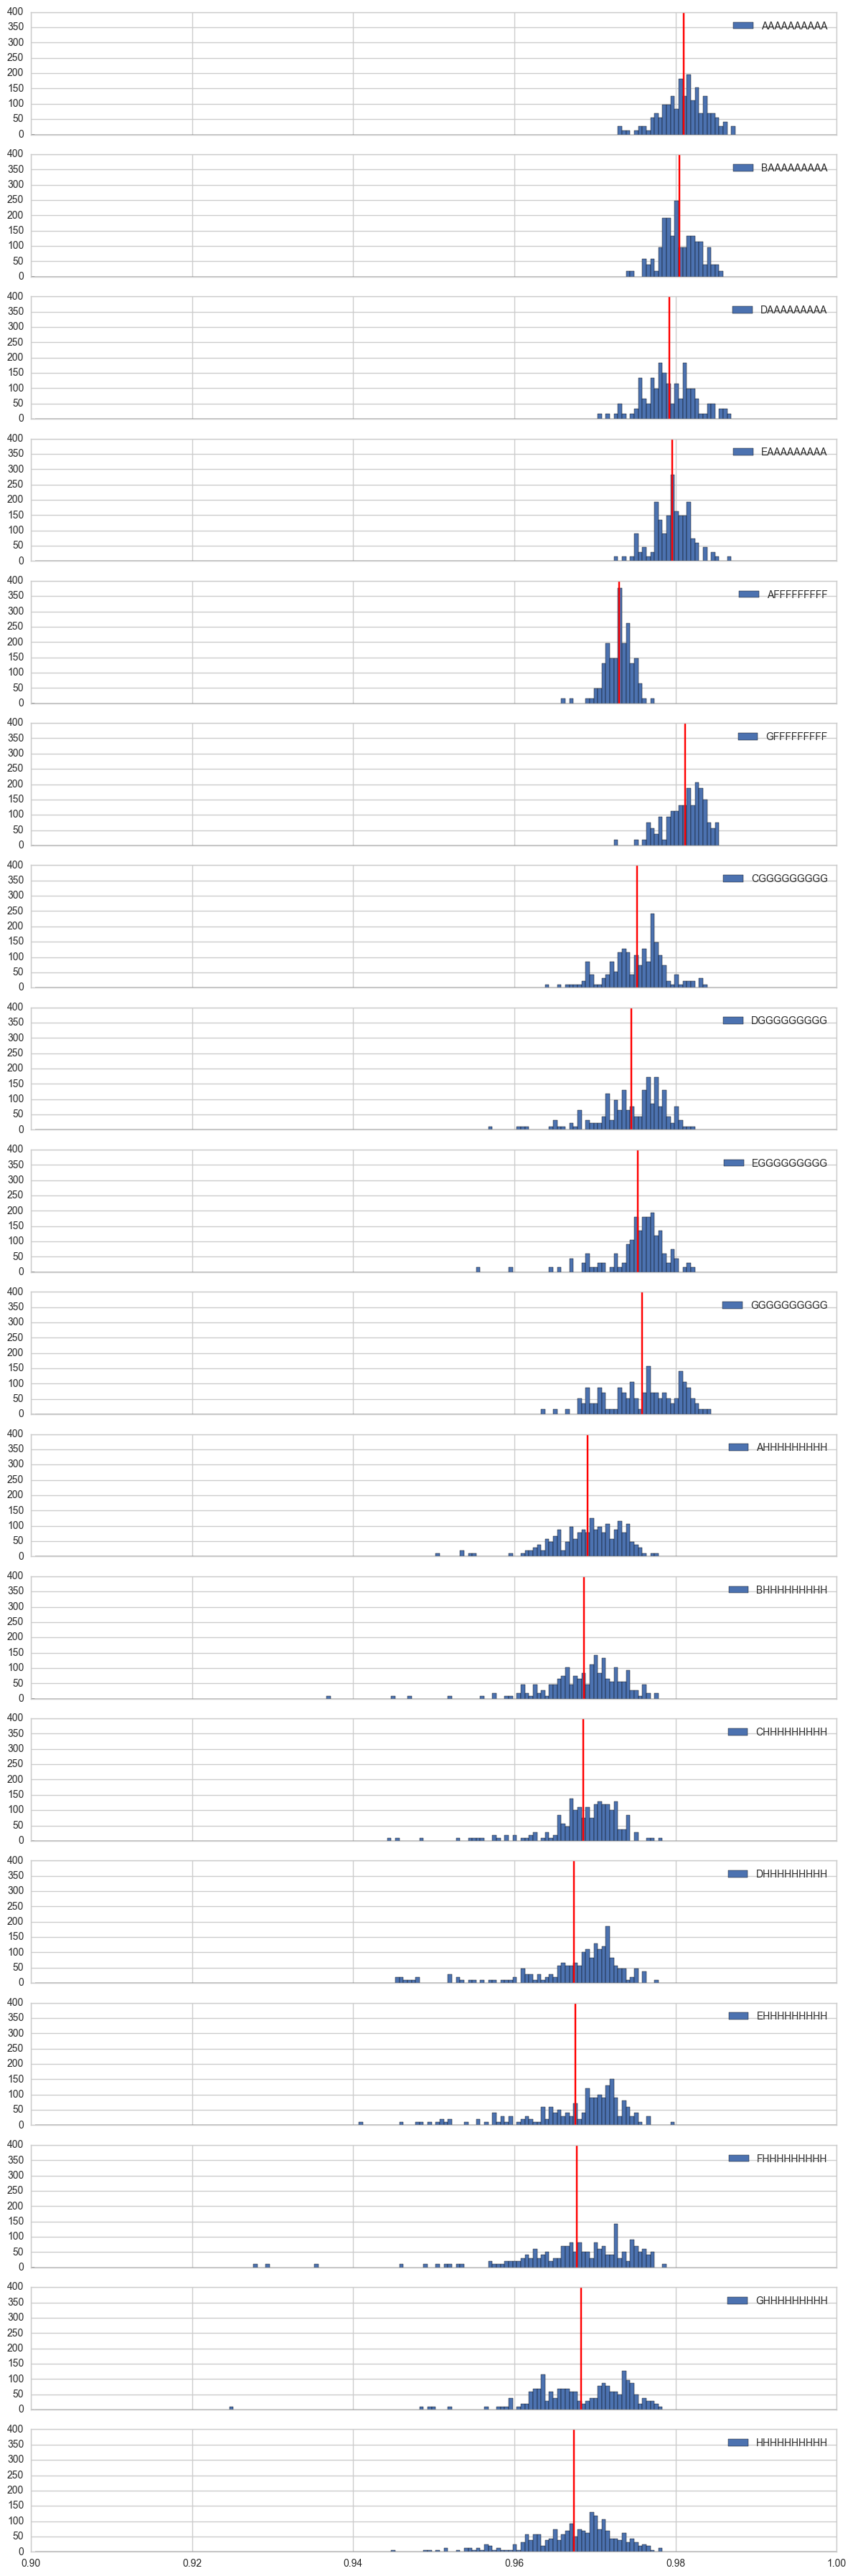

In [30]:
import matplotlib as mpl
def plothistograms(df,my_tab,limit):
    clusters = my_tab[my_tab['count']>limit].index.values.tolist()
    numclus = len(clusters)
    numSubPlots = numclus
    clusters1 = [s[::-1] for s in clusters]
    clusters1.sort()
    clusters2 = [s[::-1] for s in clusters1]
    
    print(numSubPlots,clusters2)
    #cmap=mpl.cm.Dark2.colors
    cmap=['r','g','b','y']
    cmapgen=['r','g','b','y','c','m','Olive','Brown']
    #cmap = [cmapgen[i] for i in clusters]
    f, axarr = plt.subplots(nrows=numSubPlots, ncols=1, figsize=(12,numSubPlots*2),sharex=True,sharey=True)
    for i, cluster in enumerate(clusters2):
        binBoundaries = np.linspace(0.9,1.0,200)
        axarr[i].hist(df[df['profile']==cluster]['RecRate'],bins=binBoundaries,normed=True,orientation='vertical',label=cluster)
        m = df[df['profile']==cluster]['RecRate'].mean()
        axarr[i].axvline(x=m,color='r')
        axarr[i].legend(loc='upper right',ncol=1)
    plt.tight_layout()
    
plothistograms(df_tempcol,my_tab,100)

In [26]:
df_tempcol.to_csv('profile_a8.csv')

#### Breakpoints of the temperature profiles

Order of tags in profile string:

'POARTI_17910_av', 'POARTI_17905_av', 'POARTI_17909_av', 'POARTI_17908_av', 'POARTI_17906_av', 'POARTI_17907_av', 'POARTI_17970_av', 'POARTI_17971_av', 'POARTI_17972_av', 'POARTI_17973_av'

First symbol in the string belongs to tag 'POARTI_17910_av', ...

If this symbol would be an 'A', this means that the temperature is below 125.37°C (see list below)

* Everything below the first value in the list = 'A'
* Everything between the first and the second value in the list = 'B'
* ...


In [27]:
absbps = {}
for k,v in bps.items():
    #print(k,v)
    absbps[k] = t2s.GetBreakPoints(df_tempcol[k].min(),df_tempcol[k].max(),'percentile',v)
absbps

{'POARTI_17905_av': [130.29787956496062,
  131.06479128247548,
  131.80083550124675,
  132.54184856829949,
  133.441880226135,
  134.00828361511273,
  136.25518608093248],
 'POARTI_17906_av': [132.2707760745005,
  132.94227387883024,
  133.68939452648587,
  134.70290396824299,
  135.62835311889674,
  136.52157402038597,
  138.63802909851074],
 'POARTI_17907_av': [135.07178491723789,
  135.785094783262,
  136.50463954656149,
  137.524552032977,
  138.81835964827513,
  140.203161239624,
  142.38788223266624],
 'POARTI_17908_av': [134.73387430310251,
  135.29283571169674,
  135.8889829083675,
  136.767037017007,
  137.96774864196775,
  139.02068138122598,
  140.96451187133789],
 'POARTI_17909_av': [134.87756397271588,
  135.475119403771,
  136.05652516597775,
  136.89331760803901,
  137.56492710113551,
  138.46815299987799,
  140.4518728256225],
 'POARTI_17910_av': [125.3673697106485,
  126.21602916717549,
  126.87702488071812,
  127.525152206421,
  128.22360306338385,
  128.9936736678632

#### Visual representation of the breakpoints on the distribution
Everything left from the first vertical line, is represented by an 'A' in the profile string

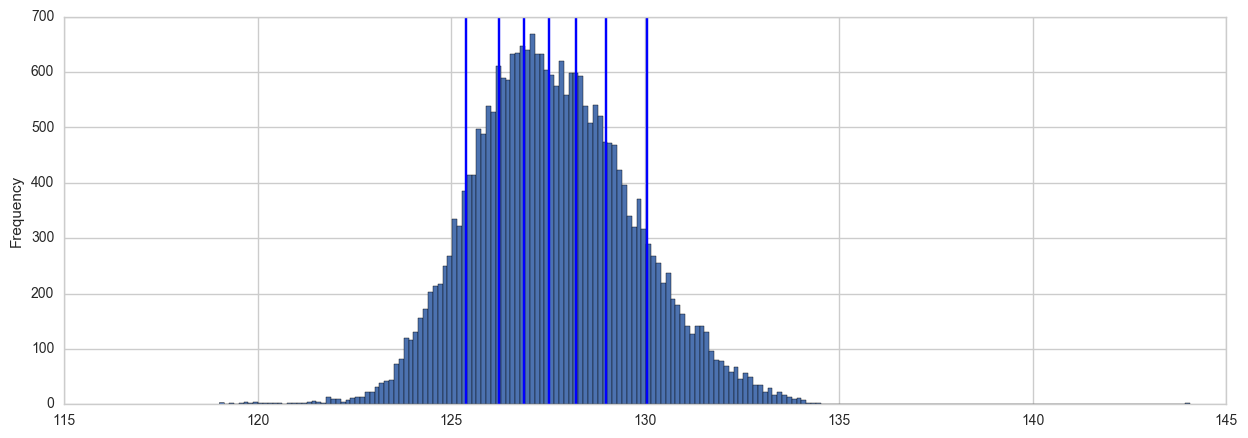

In [32]:
df_tempcol['POARTI_17910_av'].plot(kind='hist',bins=200,figsize=(15,5))
for b in absbps['POARTI_17910_av']:
    plt.axvline(x=b)

In [29]:
df_rr99 = df_tempcol[df_tempcol['RecRate']>0.99]
df_rr99.to_csv('profile99_a8.csv')